In [ ]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

# Math
from scipy import stats
from scipy.stats import norm
from math import exp
from math import sqrt

# Date
from datetime import date

import itertools

import warnings
warnings.filterwarnings('ignore')

# Images
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import autocorrelation_plot

# Split
from sklearn.model_selection import train_test_split 

# PREPROCESSING AND METRICS
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#import shap

# Pycaret
import jinja2
from pycaret.regression import *


# Prophet
#import prophet

## **Dataset**

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/vendas_forecast.csv', sep=';')
dataframe.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27 00:00:00,505.730,505.7300,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8802025,227909.0,4589715.0,1,F,2021-09-27 00:00:00,258.900,258.9000,28802,1160,0,0,102,3,F,NaN,NaN,NaN,6.090,30,a32960a0-3190-4f8d-9c3a-8e900f229380,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8802111,NaN,NaN,1,R,2021-09-27 00:00:00,673.187,673.1874,22580,2220,0,0,102,3,F,NaN,NaN,NaN,33.900,27,199eb056-c41e-46bc-b68c-c3d42bd488b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8802436,227907.0,4589694.0,1,F,2021-09-27 00:00:00,229.920,229.9200,3020,1160,0,0,7,3,F,NaN,NaN,NaN,0.240,48,8852ee59-d81b-44f2-8699-fc2b9f2140e8,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8802438,228162.0,4594076.0,1,F,2021-09-27 00:00:00,555.840,555.8400,17814,1160,0,0,7,3,F,NaN,NaN,NaN,0.120,96,e35e899c-87f8-4fdb-a53c-426b2b6f654a,NaN,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataframe.shape

(9110, 40)

In [ ]:
dataframe['dtemissao'] = pd.to_datetime(dataframe['dtemissao'])

In [ ]:
dataframe = dataframe.sort_values(by=['dtemissao'])

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9110 entries, 0 to 9109
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   numpedido                 9110 non-null   int64         
 1   numcarga                  8465 non-null   float64       
 2   numnota                   8550 non-null   float64       
 3   condvenda                 9110 non-null   int64         
 4   posicao                   9110 non-null   object        
 5   dtemissao                 9110 non-null   datetime64[ns]
 6   vltotal                   9110 non-null   float64       
 7   vltabela                  9110 non-null   float64       
 8   codcli                    9110 non-null   int64         
 9   codvendedor               9110 non-null   int64         
 10  codfilial                 9110 non-null   int64         
 11  codfilialnf               9110 non-null   int64         
 12  codplpag            

In [ ]:
dataframe.describe()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
count,9.110000e+03,8465.000000,8.550000e+03,9110.0,9110.000000,9110.000000,9110.000000,9110.000000,9110.0,9110.0,9110.000000,9110.0,0.0,0.0,9110.000000,9110.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.225599e+06,237937.496397,4.772258e+06,1.0,2893.976497,2905.616872,15877.200329,1643.720307,0.0,0.0,52.108562,3.0,NaN,NaN,161.756613,263.976619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.333481e+05,6038.862434,9.932986e+04,0.0,7996.417473,8059.193483,11429.174005,2165.399131,0.0,0.0,73.431213,0.0,NaN,NaN,779.684113,578.655821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.802020e+06,84826.000000,4.588585e+06,1.0,0.000000,0.000000,405.000000,50.000000,0.0,0.0,2.000000,3.0,NaN,NaN,0.024000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.017757e+06,233114.000000,4.686229e+06,1.0,392.780000,393.712500,4855.000000,1160.000000,0.0,0.0,7.000000,3.0,NaN,NaN,15.300000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.254040e+06,238549.000000,4.783392e+06,1.0,1150.800000,1154.420000,17814.000000,1839.000000,0.0,0.0,7.000000,3.0,NaN,NaN,50.504000,94.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.430532e+06,242751.000000,4.858753e+06,1.0,2664.944250,2682.460000,22580.000000,2220.000000,0.0,0.0,102.000000,3.0,NaN,NaN,143.737500,285.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.612466e+06,247249.000000,4.934285e+06,1.0,273120.000000,273120.000000,39996.000000,100000.000000,0.0,0.0,330.000000,3.0,NaN,NaN,59973.800000,19204.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataframe.index = pd.Index(range(9110))
dataframe.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27,505.73,505.73,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8804585,227909.0,4589720.0,1,F,2021-09-27,2581.90,2581.90,28802,574,0,0,102,3,F,NaN,NaN,NaN,254.362,638,32eba715-6b04-45d2-9f9c-03f6ca3b3cad,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8804371,227909.0,4589721.0,1,F,2021-09-27,112.52,112.52,28802,574,0,0,102,3,F,NaN,NaN,NaN,8.960,28,f97931fe-e89f-4da6-9038-81a7ca47b650,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8804370,227905.0,4589673.0,1,F,2021-09-27,75.90,75.90,22580,574,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,9.330,10,0c6965a9-2f68-4b85-bcba-600a4a962036,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8804338,227905.0,4589671.0,1,F,2021-09-27,1787.90,1787.90,22580,574,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,157.281,424,1a7c8925-8146-4405-ba03-b5c6dc58d19e,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataframe.codvendedor = dataframe.codvendedor.values.astype(str)

Text(0, 0.5, 'Vendas')

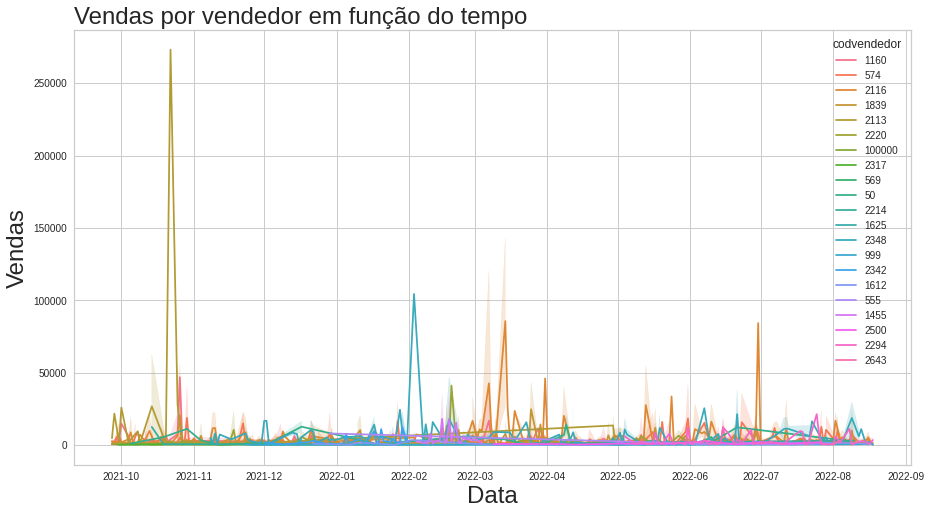

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x='dtemissao',y='vltotal',hue='codvendedor',data=dataframe)
fig.set_title('Vendas por vendedor em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Vendas',fontsize=24)

In [ ]:
#PEGANDO 1 VENDEDOR

dataframe['codvendedor'].value_counts()

1160      2321
2348      1674
574       1614
2116      1152
1839      1026
2294       391
2220       308
2113       254
1455       160
2342       100
50          35
1612        21
999         18
2500        11
555          7
2214         5
2643         5
100000       4
2317         2
1625         1
569          1
Name: codvendedor, dtype: int64

In [ ]:
df_1160 = dataframe[dataframe['codvendedor'] == '1160']
df_1160.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27,505.73,505.73,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,8802650,227867.0,4588796.0,1,ET,2021-09-27,594.24,594.24,11790,1160,0,0,7,3,F,IVANILDO DEODATO DA SILVA,NaN,NaN,0.576,96,0aceca71-f197-4746-9992-54b6ac9a98c1,27210903636036000154550010045887961541660567,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,8802581,227887.0,4589312.0,1,ET,2021-09-27,527.52,527.52,30100,1160,0,0,7,3,F,JOSE EDSON DA PAZ SANTOS,NaN,NaN,0.576,48,e2b5b4b4-1c83-4c36-98ed-ecd01f70d142,27210903636036000154550010045893121539198609,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,8802598,228044.0,4592378.0,1,ET,2021-09-27,232.80,232.80,19010,1160,0,0,7,3,F,MARCIO ALEANDRO NOGUEIRA DA SILVA,NaN,NaN,0.240,48,2c54d879-df21-4aa9-98a8-fd4adbf07836,27210903636036000154550010045923781640395116,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8802025,227909.0,4589715.0,1,F,2021-09-27,258.90,258.90,28802,1160,0,0,102,3,F,NaN,NaN,NaN,6.090,30,a32960a0-3190-4f8d-9c3a-8e900f229380,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = px.line(df_1160, x="dtemissao", y=["vltotal"])
fig.show()

In [ ]:
df_1160.shape

(2321, 40)

In [38]:
df = df_1160.groupby(df_1160['dtemissao']).sum()
df.shape

(207, 33)

In [39]:
df

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codfilial,codfilialnf,codplpag,...,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,
2021-09-27,114431469,2963798.0,59684171.0,13,5062.070,5062.0700,183918,0,0,281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4971.790
2021-09-28,8809240,227987.0,4591551.0,1,3049.300,3049.3000,405,0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.520
2021-09-29,149792426,3877470.0,78083515.0,17,75858.840,75884.8400,241560,0,0,320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77360.340
2021-09-30,158699258,3650286.0,73500494.0,18,69926.710,69926.7083,404633,0,0,718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71367.590
2021-10-01,8819317,0.0,0.0,1,14842.031,14842.0310,37028,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-13,201581159,5186990.0,103517155.0,21,44509.854,44509.8475,219324,0,0,147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42038.781
2022-08-15,28798737,494162.0,9861993.0,3,3966.670,3966.6684,67740,0,0,306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4931.352
2022-08-16,211307931,5437840.0,108516123.0,22,14293.688,14293.6974,306568,0,0,154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15831.296


In [40]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [41]:
len(test)

208

In [42]:
test.pop(207)

269.24

In [43]:
len(test)

207

In [44]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codfilial,codfilialnf,codplpag,...,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,
2021-09-27,114431469,2963798.0,59684171.0,13,5062.070,5062.0700,183918,0,0,281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.24
2021-09-28,8809240,227987.0,4591551.0,1,3049.300,3049.3000,405,0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5062.07
2021-09-29,149792426,3877470.0,78083515.0,17,75858.840,75884.8400,241560,0,0,320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049.30
2021-09-30,158699258,3650286.0,73500494.0,18,69926.710,69926.7083,404633,0,0,718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75858.84
2021-10-01,8819317,0.0,0.0,1,14842.031,14842.0310,37028,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69926.71


In [48]:
df_reg = df[['vltotal', 'test']]

In [49]:
df_reg

,vltotal,test
dtemissao,,
2021-09-27,5062.070,269.240
2021-09-28,3049.300,5062.070
2021-09-29,75858.840,3049.300
2021-09-30,69926.710,75858.840
2021-10-01,14842.031,69926.710
...,...,...
2022-08-13,44509.854,4038.687
2022-08-15,3966.670,44509.854
2022-08-16,14293.688,3966.670


In [50]:
regscsc = setup(data = df_reg, 
            target ='test',
            session_id = 0,
            fold=10,
            #remove_multicollinearity = True,
            #multicollinearity_threshold = 0.1,
            normalize = True,
            normalize_method = 'minmax',
            #feature_selection	= True,
            #feature_selection_threshold = 0.99

            )

,Description,Value
0,session_id,0
1,Target,test
2,Original Data,"(207, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(144, 1)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='test',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='m...
                                                  target='test')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passth

In [51]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,20275.2021,2.260098e+09,36268.5188,-0.1030,1.5943,9.3512,0.014
par,Passive Aggressive Regressor,19845.2415,2.311547e+09,36662.9903,-0.1136,1.5568,7.7589,0.014
dummy,Dummy Regressor,23822.7433,2.181969e+09,37334.6215,-0.4055,1.8079,17.0669,0.012
br,Bayesian Ridge,23822.7427,2.181970e+09,37334.6216,-0.4055,1.8079,17.0669,0.011
en,Elastic Net,23805.7911,2.180898e+09,37326.0863,-0.4063,1.8070,17.0224,0.012
lightgbm,Light Gradient Boosting Machine,23119.9528,2.186426e+09,37708.6712,-0.4749,1.7298,13.9260,0.077
ridge,Ridge Regression,23685.5641,2.189063e+09,37807.0805,-0.6593,1.7892,16.0046,0.012
knn,K Neighbors Regressor,23659.4350,2.333611e+09,40205.9831,-0.9920,1.7649,12.6590,0.060
llar,Lasso Least Angle Regression,23808.4986,2.242566e+09,38721.6953,-1.1821,1.7800,15.3734,0.012
lasso,Lasso Regression,23808.2444,2.242559e+09,38721.7041,-1.1823,1.7800,15.3729,0.013


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [53]:
huber = create_model("huber")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38845.0099,9.756267e+09,98773.8193,-0.0888,1.6279,5.6578
1,44444.9002,7.495786e+09,86578.2065,-0.3056,1.4190,0.8519
2,13956.4890,3.833525e+08,19579.3885,0.0101,1.1739,2.0619
3,31649.7408,3.056405e+09,55284.7608,-0.2891,1.9347,9.6802
4,12756.9946,4.080088e+08,20199.2275,0.0157,1.2465,2.3376
5,11971.0798,2.220444e+08,14901.1534,0.0001,1.2380,2.5234
6,10696.3345,1.675060e+08,12942.4108,-0.0109,1.6088,5.2093
7,10269.5903,1.656061e+08,12868.8018,-0.3499,1.8903,21.2890
8,17012.9698,7.399074e+08,27201.2384,-0.0177,1.9881,31.3683


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [54]:
evaluate_model(best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
y_pred = predict_model(best_model, data= df_reg)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,19111.8603,1.833721e+09,42821.9743,-0.0467,1.5138,7.0442


In [59]:
y_pred.index = pd.Index(range(207))
y_pred

,vltotal,test,Label
0,5062.070,269.240,13759.803200
1,3049.300,5062.070,13700.064792
2,75858.840,3049.300,15861.030549
3,69926.710,75858.840,15684.966679
4,14842.031,69926.710,14050.069596
...,...,...,...
202,44509.854,4038.687,14930.601832
203,3966.670,44509.854,13727.292051
204,14293.688,3966.670,14033.794940
205,12175.734,14293.688,13970.934675


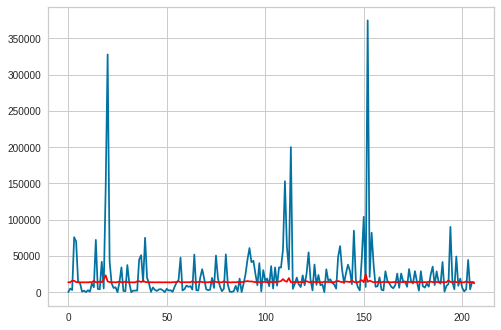

In [60]:
# plot o valor real e as predições 
plt.plot(y_pred.test.values) 
plt.plot(y_pred.Label, color='red')
plt.show()

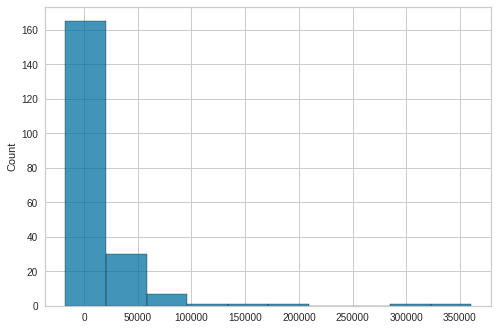

In [61]:
absolute_error = y_pred.test - y_pred.Label
sns.histplot(absolute_error, bins=10)

In [62]:
print(f'MAE: {metrics.mean_absolute_error(y_pred.test, y_pred.Label):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_pred.test, y_pred.Label):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_pred.test, y_pred.Label)):.2f}')
print(f'R: {metrics.r2_score(y_pred.test, y_pred.Label):.2f}')
MAPE = np.mean(100 * (np.abs(y_pred.test - y_pred.Label)/y_pred.test))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y_pred.test.mean():.2f}')
print(f'median y_test: {y_pred.test.median():.2f}')
print(f'mean pred: {y_pred.Label.mean():.2f}')
print(f'median pred: {np.median(y_pred.Label):.2f}')

MAE: 19111.86
MSE: 1833721478.82
RMSE: 42821.97
R: -0.05
MAPE: 704.42
Acurácia: -604.42
mean y_test: 24138.34
median y_test: 12029.01
mean pred: 14325.98
median pred: 13966.58
